In [7]:
import scipy
import scipy.io
from scipy.io import savemat
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import math

In [8]:
v_range = 10
h_range = 10
n_elements_brain = 32
t_increment_brain = 11.3
Rician_opt = True
test_name = "Ric_triTest"
TDATA = np.linspace(t_increment_brain, (n_elements_brain)*(t_increment_brain), n_elements_brain)

initial_shape = np.ones((v_range,h_range,n_elements_brain))

SNR = 100
sigma = 1/SNR

biX_sig = 0.2*np.exp(-TDATA/30)+0.8*np.exp(-TDATA/80)
moX_sig = np.exp(-TDATA/40)

if Rician_opt:

    #biX Rician
    noise_real=np.random.normal(loc=0.0, scale=sigma, size=len(TDATA))
    noise_imag=np.random.normal(loc=0.0, scale=sigma, size=len(TDATA))

    noisy_sig_channel=biX_sig+noise_real
    noisy_quadrature_channel=noise_imag
    SigVect_biX=np.sqrt(noisy_sig_channel**2+noisy_quadrature_channel**2)

    #moX Rician
    noise_real=np.random.normal(loc=0.0, scale=sigma, size=len(TDATA))
    noise_imag=np.random.normal(loc=0.0, scale=sigma, size=len(TDATA))

    noisy_sig_channel=moX_sig+noise_real
    noisy_quadrature_channel=noise_imag
    SigVect_moX=np.sqrt(noisy_sig_channel**2+noisy_quadrature_channel**2)
else:
    SigVect_biX = biX_sig + 0.05
    SigVect_moX = moX_sig + 0.05
    

biX_data = initial_shape*SigVect_biX

moX_data = initial_shape*SigVect_moX



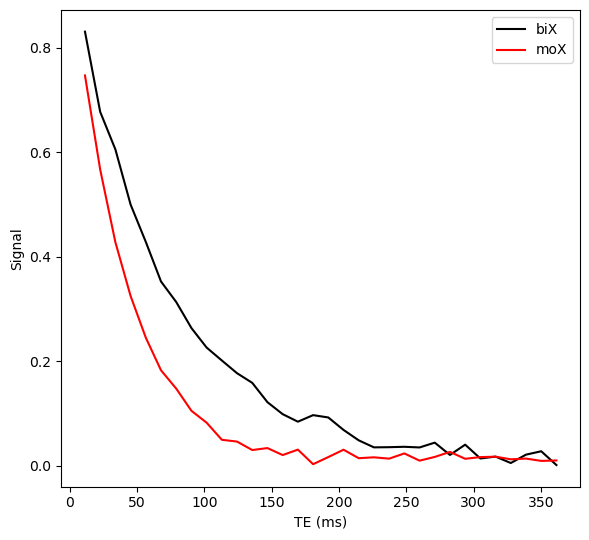

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,5.5),tight_layout=True)
plt.plot(TDATA, biX_data[0,0,:], color = 'k', label = 'biX')
plt.plot(TDATA, moX_data[0,0,:], color = 'r', label = 'moX')
plt.xlabel('TE (ms)')
plt.ylabel('Signal')
plt.legend()

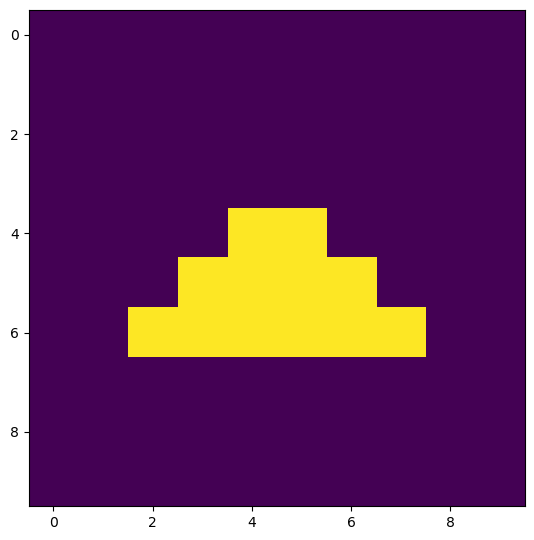

In [10]:
bool_array = np.zeros((v_range, h_range))

for i in range(v_range):
    for j in range(h_range):
        if (i+2 > j) and (v_range-i-3 < j) and (i<v_range - 3):
            bool_array[i,j] = 1

fig, ax = plt.subplots(1,1,figsize=(15,5.5),tight_layout=True)
plt.imshow(bool_array)

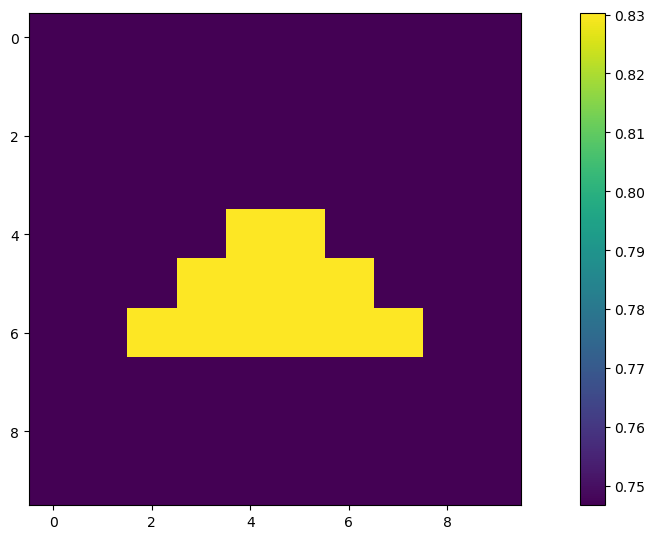

In [11]:
bool_array_3D = bool_array[:,:,np.newaxis]

BIC_triTest = biX_data*bool_array_3D + moX_data*((bool_array_3D+1)%2)

fig, ax = plt.subplots(1,1,figsize=(15,5.5),tight_layout=True)
triangle = plt.imshow(BIC_triTest[:,:,0])
fig.colorbar(triangle, ax=ax, fraction=0.046, pad=0.04)

In [12]:
savemat(f"MB_References/BIC_tests/{test_name}.mat", {test_name: BIC_triTest})